# Google Playstore Analysis & Visualization

### In this notebook, we are aiming to understand the trend of current Google Playstore market.  

We create an analysis and visualization to interpret our findings on the Google Play Apps Dataset & try to find some key insights.

In [ ]:
#import necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


In [ ]:
# reading data
gps_df=pd.read_csv('googleplaystore.csv.zip')

In [ ]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
gps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#no of rows and columns
print('No.of rows: ',gps_df.shape[0])
print('No.of columns: ',gps_df.shape[1])

No.of rows:  10841
No.of columns:  13


In [ ]:
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
gps_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [ ]:
# separating Last Updated column into 2 different columns and then dropping last Updated column
gps_df[['update_Date','update_Year']]=gps_df['Last Updated'].str.split(',',expand=True)

In [ ]:
gps_df.drop('Last Updated',inplace=True,axis=1)

In [ ]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,update_Date,update_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018


In [ ]:
gps_df['Installs']=gps_df['Installs'].str.replace('+','')
gps_df['Installs']=gps_df['Installs'].str.replace(',','')


In [ ]:
gps_df['unit']=[i[-1] for i in gps_df['Size']]

gps_df['Size']=gps_df['Size'].str.replace('Varies with device','0')

In [ ]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,update_Date,update_Year,unit
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018,M


In [ ]:
#gps_df['Size'].unique()

In [ ]:
gps_df['Size'] = [x.strip().replace('M', '') for x in gps_df['Size']]

gps_df['Size'] = [x.strip().replace('k', '') for x in gps_df['Size']]

In [ ]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,update_Date,update_Year,unit
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018,M


In [ ]:
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  update_Date     10841 non-null  object 
 13  update_Year     10840 non-null  object 
 14  unit            10841 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.2+ MB


In [ ]:
#check for null values
gps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Current Ver          8
Android Ver          3
update_Date          0
update_Year          1
unit                 0
dtype: int64

## Handelling null/ missing Values

In [ ]:
#fill NaN Values
gps_df['Rating'].fillna(gps_df['Rating'].mean(),inplace=True)

In [ ]:
gps_df['Type'].fillna(method='ffill',inplace=True)
gps_df['Content Rating'].fillna(method='ffill',inplace=True)
gps_df['Current Ver'].fillna(method='ffill',inplace=True)
gps_df['Android Ver'].fillna(method='ffill',inplace=True)
gps_df['update_Year'].fillna(method='ffill',inplace=True)

In [ ]:
gps_df['Rating'].unique()

array([ 4.1       ,  3.9       ,  4.7       ,  4.5       ,  4.3       ,
        4.4       ,  3.8       ,  4.2       ,  4.6       ,  3.2       ,
        4.        ,  4.19333832,  4.8       ,  4.9       ,  3.6       ,
        3.7       ,  3.3       ,  3.4       ,  3.5       ,  3.1       ,
        5.        ,  2.6       ,  3.        ,  1.9       ,  2.5       ,
        2.8       ,  2.7       ,  1.        ,  2.9       ,  2.3       ,
        2.2       ,  1.7       ,  2.        ,  1.8       ,  2.4       ,
        1.6       ,  2.1       ,  1.4       ,  1.5       ,  1.2       ,
       19.        ])

In [ ]:
#remove weired anomaly
gps_df[gps_df['Rating']==19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,update_Date,update_Year,unit
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",4.0 and up,4.0.3 and up,1.0.19,2014,+


In [ ]:
gps_df.drop([10472],inplace=True)

In [ ]:
# change the datatypes of numerical columns 
gps_df["Reviews"]= gps_df['Reviews'].apply(lambda x: int(x))
gps_df["Rating"]= gps_df['Rating'].apply(lambda x: int(x))
gps_df["update_Year"]= gps_df['update_Year'].apply(lambda x: int(x))

gps_df["Size"] = gps_df["Size"].apply(lambda x: float(x) if x != "Varies with device" else str(x))

gps_df['Installs']= [int(x) if x.isnumeric() else x for x in gps_df['Installs']]

In [ ]:
gps_df["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
gps_df["Price"]=[x.strip().replace('$','') for x in gps_df["Price"]]


In [ ]:
gps_df["Price"]=gps_df["Price"].apply(lambda x:float(x))


In [ ]:
gps_df["Price"].dtype

dtype('O')

In [ ]:
gps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  int64  
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10840 non-null  object 
 11  Android Ver     10840 non-null  object 
 12  update_Date     10840 non-null  object 
 13  update_Year     10840 non-null  int64  
 14  unit            10840 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1.3+ MB


In [ ]:
gps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,update_Date,update_Year,unit
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19.0,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up,January 7,2018,M
1,Coloring book moana,ART_AND_DESIGN,3,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January 15,2018,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8.7,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up,August 1,2018,M
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25.0,50000000,Free,0,Teen,Art & Design,Varies with device,4.2 and up,June 8,2018,M
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June 20,2018,M


In [ ]:
#groupwise % apps installed
perct_installation=gps_df['Installs'].value_counts()/gps_df['Installs'].value_counts().sum()*100
perct_installation

1000000       14.566421
10000000      11.549815
100000        10.784133
10000          9.723247
1000           8.367159
5000000        6.937269
100            6.632841
500000         4.972325
50000          4.418819
5000           4.400369
100000000      3.773063
10             3.560886
500            3.044280
50000000       2.666052
50             1.891144
5              0.756458
500000000      0.664207
1              0.618081
1000000000     0.535055
0              0.138376
Name: Installs, dtype: float64

## Visualization

In [ ]:
#gps_df[['Category','Installs']].groupby('Category').reset_index().sort_values(by='Installs',ascending=False).plot(kind='bar',color='cyan')

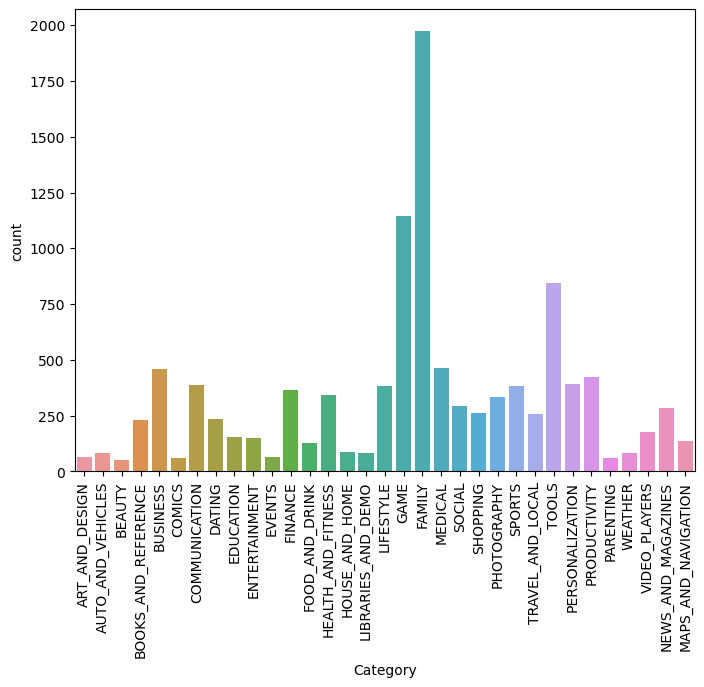

In [ ]:
#count of apps in categories
plt.figure(figsize=(8,6))
sns.countplot(gps_df['Category'])
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Category'>

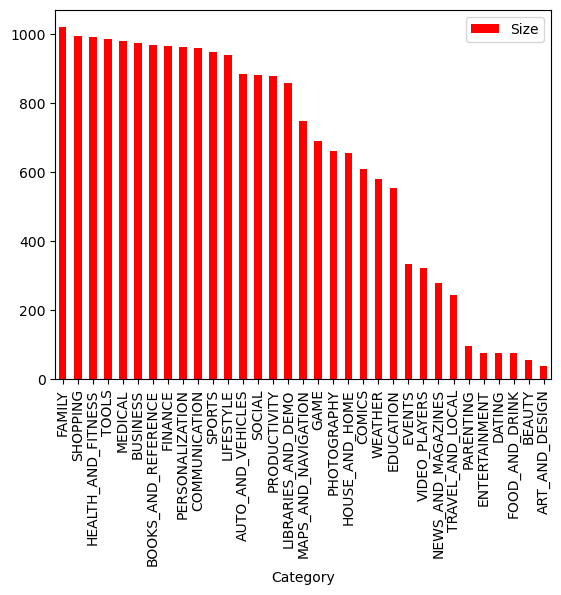

In [ ]:
gps_df[['Category','Size']].groupby('Category').max().sort_values(by='Size',ascending=False).plot(kind='bar',color='red')

In [ ]:
#top categories based on total apps
top_cat=gps_df.groupby('Category').size().reset_index(name='apps_avail_Count').sort_values(by='apps_avail_Count',ascending=False)
#display(top_cat)


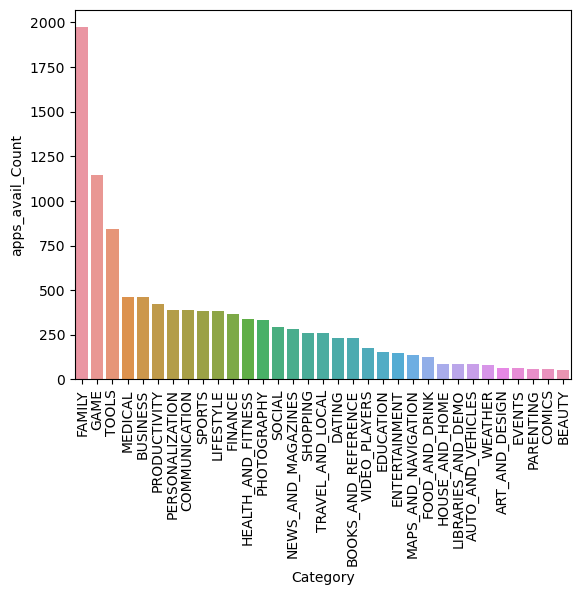

In [ ]:
sns.barplot(top_cat['Category'],top_cat['apps_avail_Count'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#top5 categories based on installation
top5_cat = top_cat['Category'].tolist()
data_top5 = gps_df.groupby('Category')['Installs'].agg('sum').loc[top5_cat].reset_index(name='Number_Installations')
data =  gps_df.groupby('Category')['Installs'].agg('sum').reset_index(name='Number_Installations')
#data

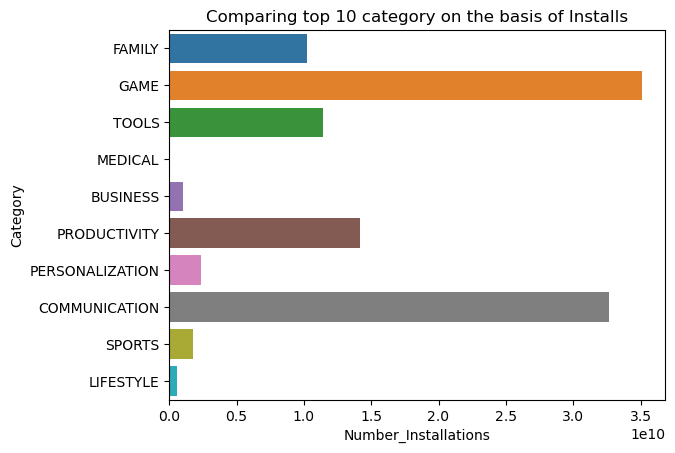

In [ ]:
sns.barplot(data_top5['Number_Installations'][0:10],data_top5['Category'][0:10])
title=plt.title('Comparing top 10 category on the basis of Installs')


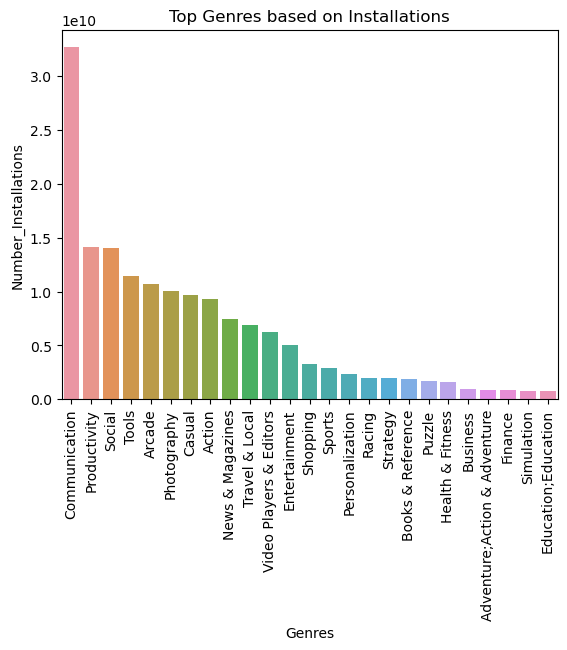

In [ ]:
#installations based on Genres
data =  gps_df.groupby('Genres')['Installs'].agg('sum').sort_values(ascending= False).reset_index(name='Number_Installations').head(25)
data
sns.barplot(data['Genres'],data['Number_Installations'])
plt.xticks(rotation=90)
plt.title('Top Genres based on Installations')
plt.show()

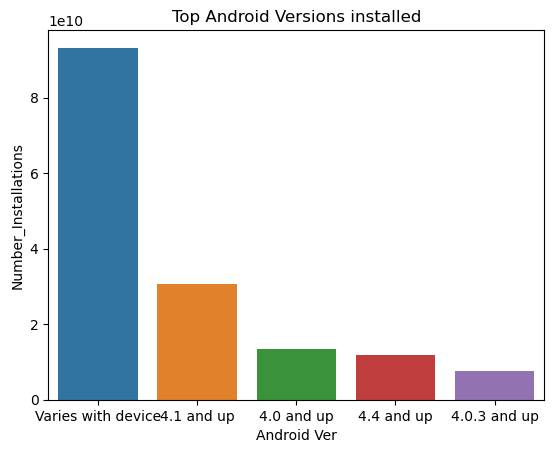

In [ ]:
# Top versions installed
data_version =  gps_df.groupby('Android Ver')['Installs'].agg('sum').sort_values(ascending=False).reset_index(name='Number_Installations').head(5)
data_version
sns.barplot(data_version['Android Ver'],data_version['Number_Installations'])
plt.title('Top Android Versions installed')
plt.show()

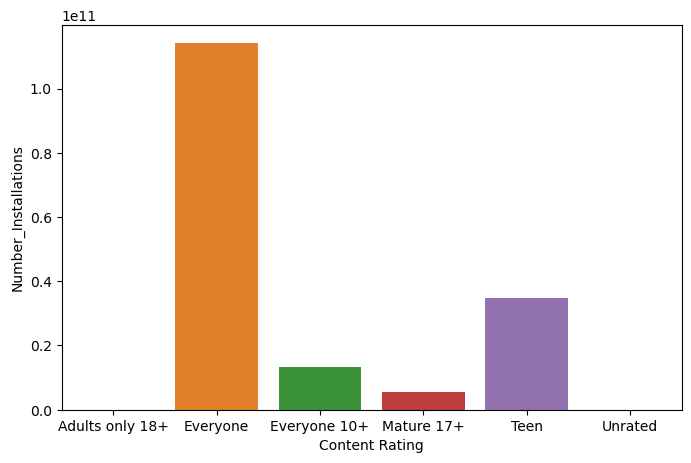

,Content Rating,Number_Installations
0,Adults only 18+,2000000
1,Everyone,114156659621
2,Everyone 10+,13233881795
3,Mature 17+,5524491178
4,Teen,34716350393
5,Unrated,50500


In [ ]:
#installations based on content rating
data_cont =  gps_df.groupby('Content Rating')['Installs'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(8,5))
sns.barplot(data_cont['Content Rating'], data_cont['Number_Installations'])
plt.show()
data_cont


In [ ]:
app_sum_content = gps_df.groupby('Content Rating')['Installs'].size().reset_index(name='Number_Apps')
app_sum_content

,Content Rating,Number_Apps
0,Adults only 18+,3
1,Everyone,8714
2,Everyone 10+,414
3,Mature 17+,499
4,Teen,1208
5,Unrated,2


<AxesSubplot:xlabel='Content Rating', ylabel='Number_Apps'>

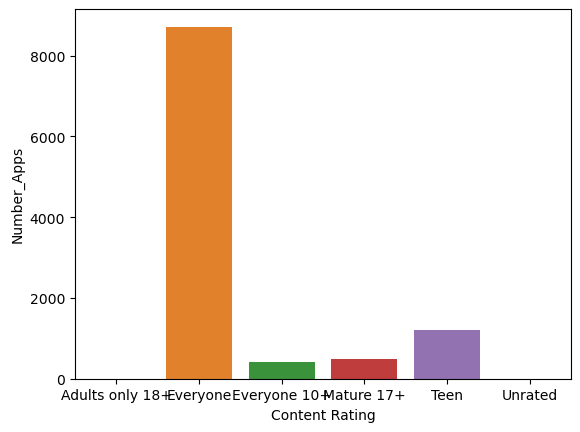

In [ ]:
sns.barplot(app_sum_content['Content Rating'],app_sum_content['Number_Apps'])

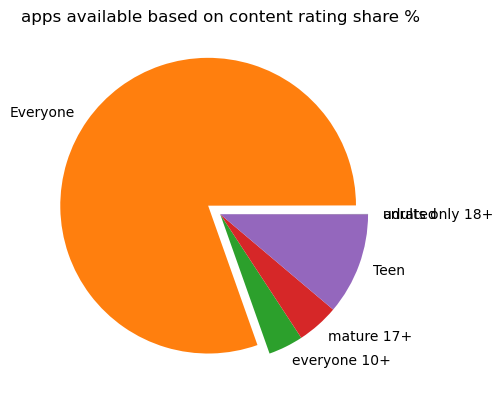

In [ ]:
plt.pie(app_sum_content['Number_Apps'],labels=['adults only 18+','Everyone','everyone 10+','mature 17+','Teen','unrated'],explode=[0,0.1,0,0,0,0])
plt.title('apps available based on content rating share %') 
plt.show()

<AxesSubplot:ylabel='App'>

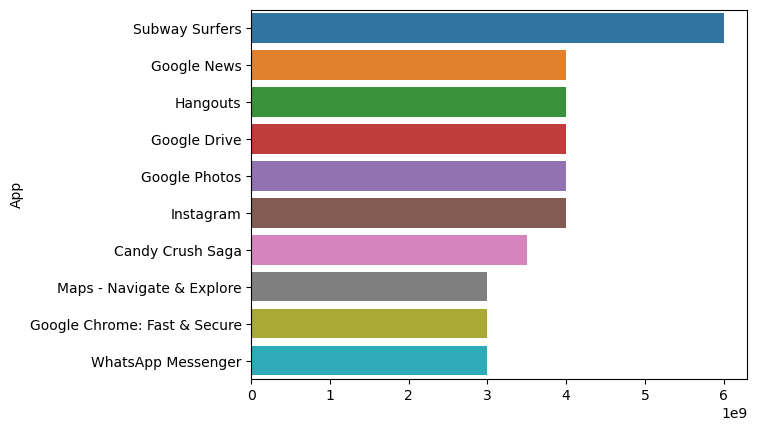

In [ ]:
# Top apps installed
x= gps_df.groupby("App").Installs.sum().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)


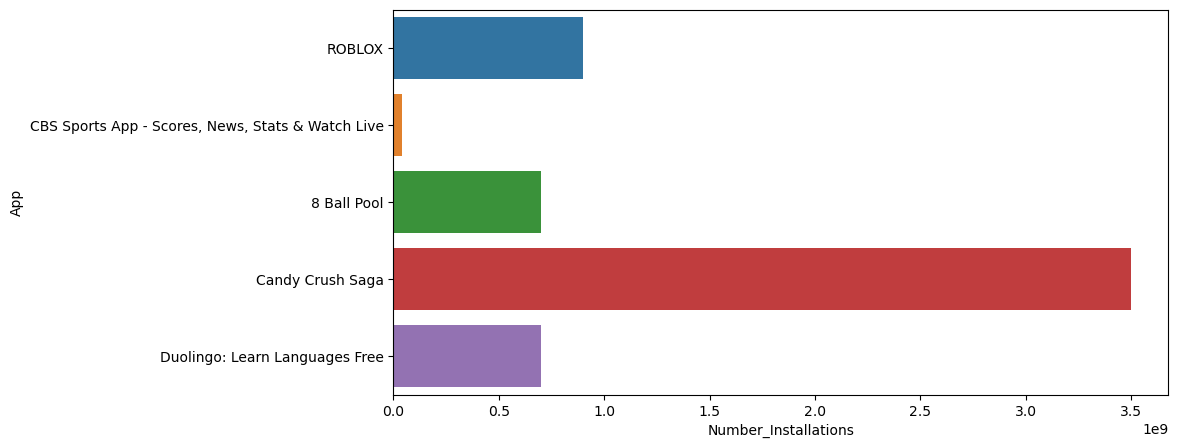

In [ ]:
top_app = gps_df.groupby('App').size().reset_index(name='Count').nlargest(5,'Count')
top5_app = top_app['App'].tolist()
data_app = gps_df.groupby('App')['Installs'].agg('sum').loc[top5_app].reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_app['Number_Installations'], y=data_app['App'])
plt.show()

Text(0.5, 1.0, 'Inspecting distribution of Ratings')

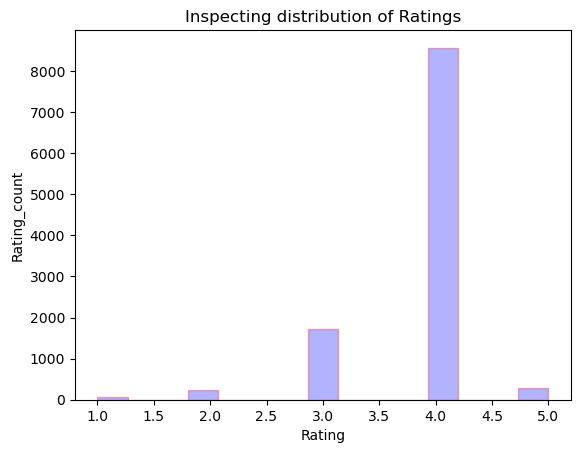

In [ ]:
#plotting histogram showing distribution of ratings
plt.hist(gps_df['Rating'],alpha=0.3,color='blue',bins=15,edgecolor='red') 
plt.xlabel('Rating') 
plt.ylabel('Rating_count')  
plt.title('Inspecting distribution of Ratings') 

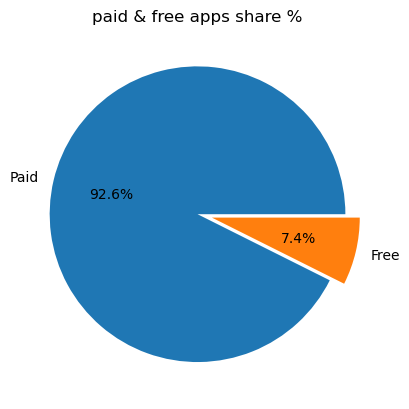

In [ ]:
#share % of Paid & Free apps available on playstore
x= gps_df.Type.value_counts()

plt.pie(x,labels=['Paid','Free'],autopct= "%1.1f%%",explode=[0,0.1])
plt.title('paid & free apps share %') 
plt.show()

<AxesSubplot:ylabel='Frequency'>

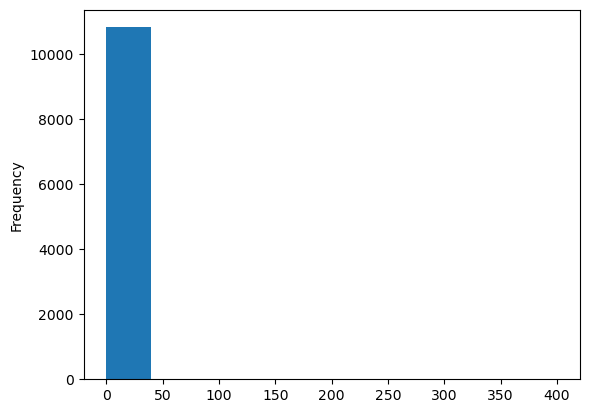

In [ ]:
#paid apps price distribution
gps_df['Price'].sort_values(ascending=False).plot(kind='hist')


In [ ]:
gps_df.corr()

,Rating,Reviews,Size,Installs,update_Year
Rating,1.000000,0.052253,-0.024350,0.046412,0.097852
Reviews,0.052253,1.000000,-0.005583,0.643122,0.075537
Size,-0.024350,-0.005583,1.000000,-0.026140,-0.234350
Installs,0.046412,0.643122,-0.026140,1.000000,0.089368
update_Year,0.097852,0.075537,-0.234350,0.089368,1.000000


<AxesSubplot:>

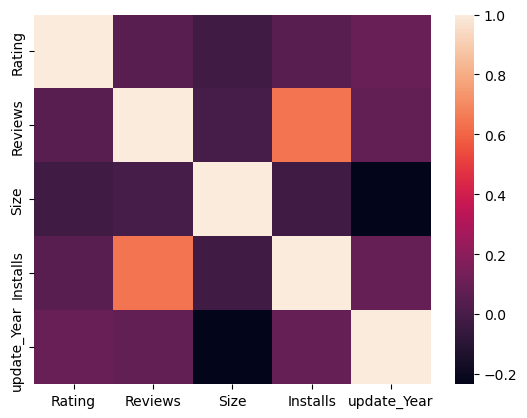

In [ ]:
sns.heatmap(gps_df.corr())

In [ ]:
gdnum = pd.DataFrame()
gdnum["Size"] = gps_df["Size"]
gdnum["Installs"] = gps_df["Installs"]
gdnum.head()

,Size,Installs
0,19.0,10000
1,14.0,500000
2,8.7,5000000
3,25.0,50000000
4,2.8,100000


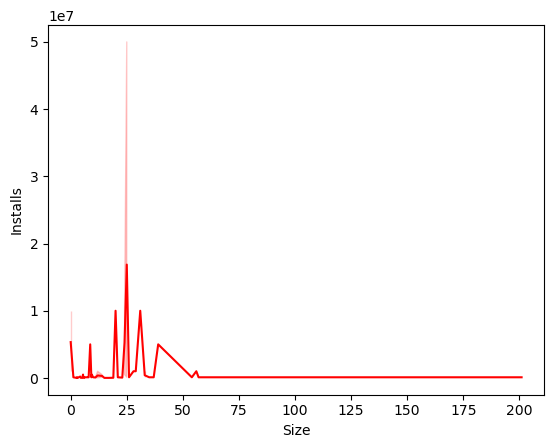

In [ ]:
y=sns.lineplot(gdnum['Size'][0:60],gdnum['Installs'][0:60],color='red')
plt.xticks(rotation=0)
plt.show()

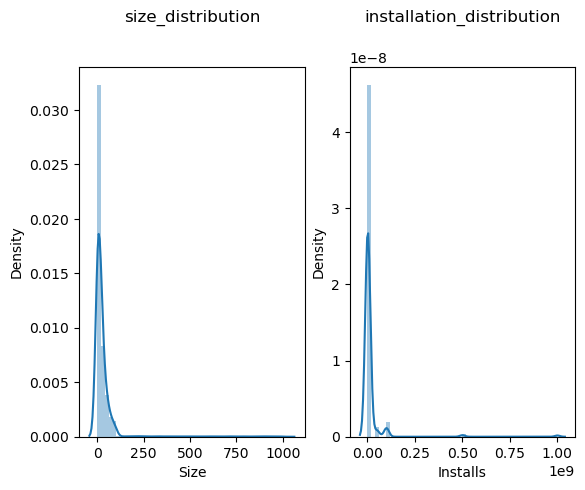

In [ ]:
fig,ax = plt.subplots(ncols=2, nrows=1)

title=ax[0].set_title("size_distribution", y = 1.1)
title=ax[1].set_title("installation_distribution", y = 1.1)

plot1=sns.distplot(gps_df['Size'] , ax=ax[0])

plot2=sns.distplot(gps_df['Installs'] , ax=ax[1])

plt.show(fig)


<AxesSubplot:xlabel='Rating', ylabel='Installs'>

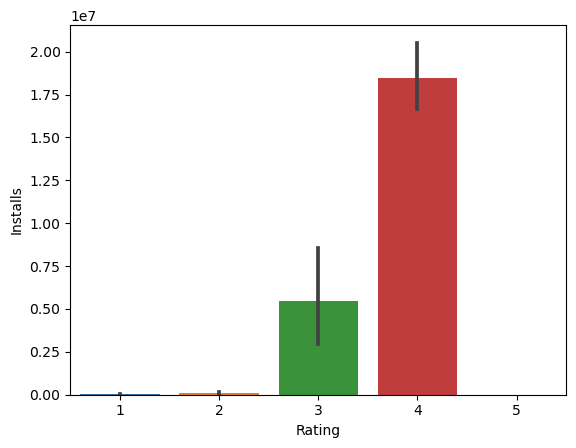

In [ ]:
'''reviews_data=gps_df.groupby('Rating')['Installs'].agg('sum').sort_values(ascending=False).reset_index(name='no.of installs').head(5)
reviews_data
sns.scatterplot(reviews_data['Rating'],reviews_data['no.of installs'])'''
sns.barplot(gps_df['Rating'],gps_df['Installs'])


In [ ]:
install_data=gps_df.groupby('unit')['Installs'].agg('sum').reset_index(name='no.of installation')
install_data

,unit,no.of installation
0,M,64935672000
1,e,102568200023
2,k,129561464


<AxesSubplot:xlabel='unit', ylabel='no.of installation'>

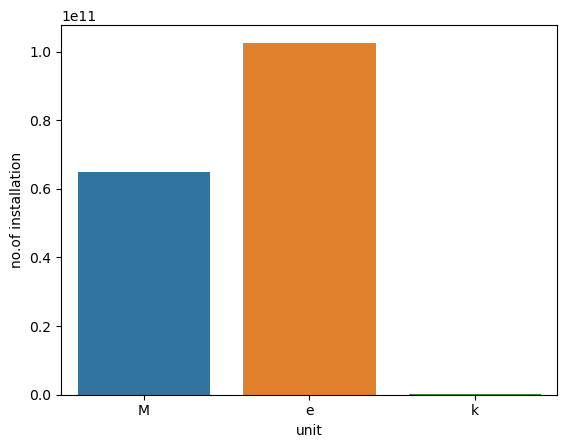

In [ ]:
#total installations by unit
sns.barplot(install_data['unit'],install_data['no.of installation'])


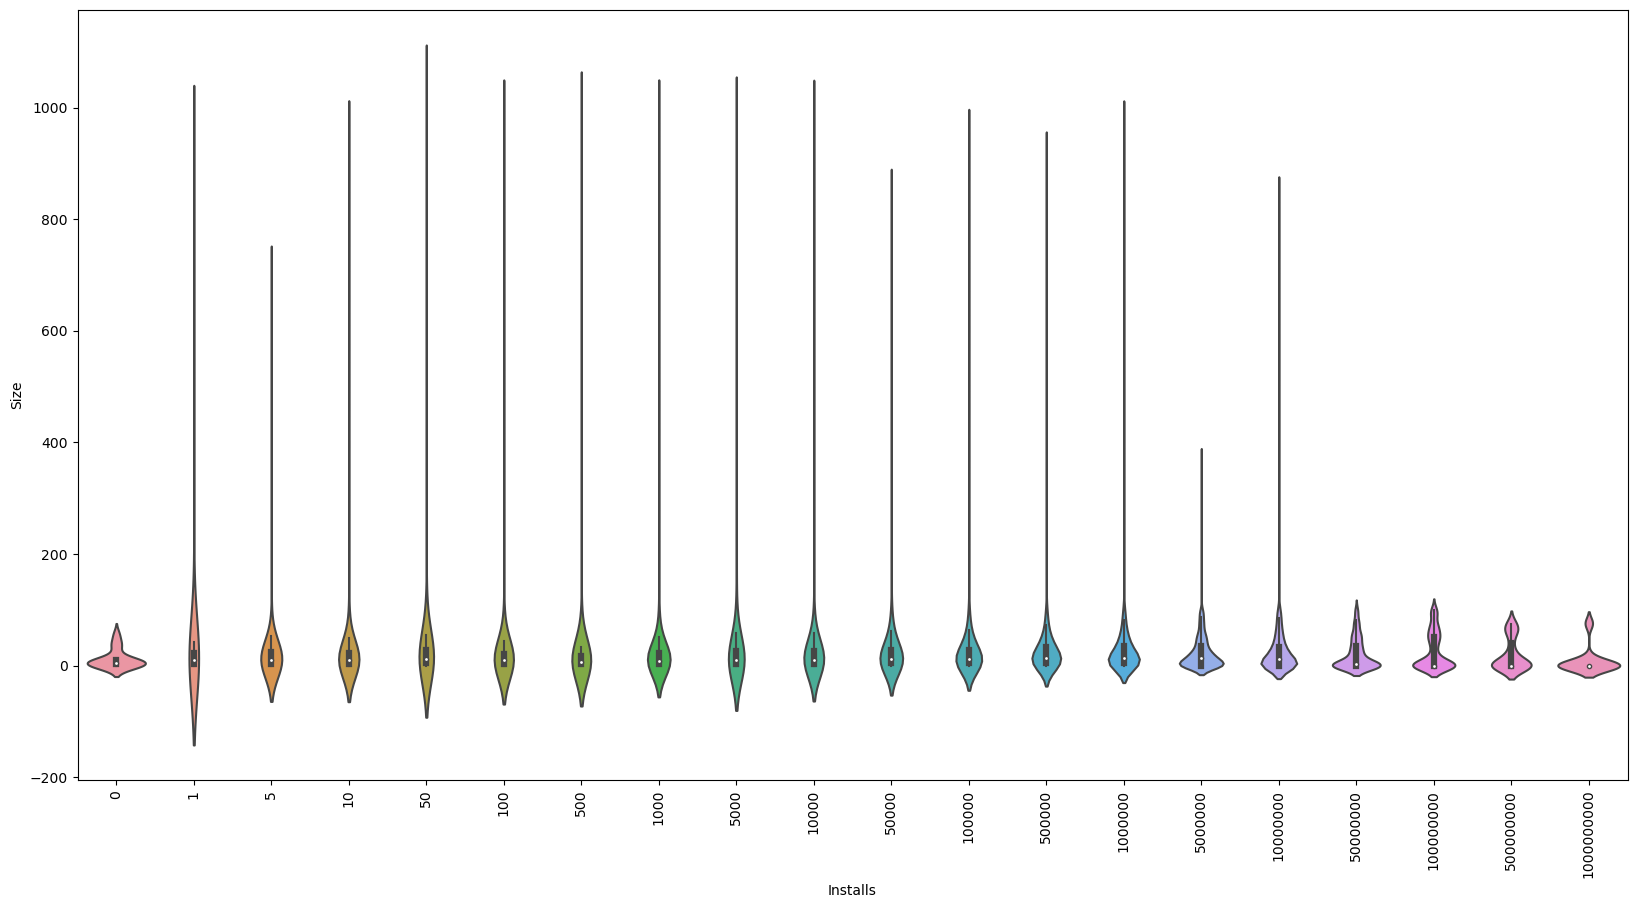

In [ ]:
# Using violin plot to plot the relation 
plt.figure(figsize=(20,10))
sns.violinplot(x=gdnum.Installs, y=gdnum.Size)
plt.xticks(rotation = 90)
plt.show()

## Key Insights

At the end of our EDA on the Google Playstore dataset,we have found out the following infereneces:

- Ratings have an effect on our target variable. The higher the rating, more people will be inclined to download the app.
- Similarly, the better the Reviews, more are the chances for the app to be downloaded by more people.
- People are always inclined to download apps that are free of cost.
- Apps that falls under the Content Rating, 'Everyone', 'Teens' and 'Everyone 10+' has the highest chance to be downloaded. For prospective app developers and publishers, it will be worthwhile to invest in apps falling under these Content Ratings.
- The apps with smaller sizes have more chance to be downloaded.
- Subway surfer is the most downloaded app followed by Instagram, Hangouts and Google Drive
- 92.6% of the apps in the app store are free.
- apps having ratings close to 3 & 4 having installations higher